We're bringing in three tools:

- NumPy: helps with math stuff (we won’t use it much here)

- Pandas: helps us read and work with tables of data (like Excel but in Python)

- Matplotlib: helps us draw charts (bar graphs, line charts, etc.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

      We’re opening the CSV file (your movie data) and taking a quick look at the first few rows to understand what’s inside.

In [2]:
data = pd.read_csv('Data/movies.csv')

In [3]:
data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\r\nAction, Horror, Thriller",6.1,\r\nA woman with a mysterious illness is force...,\r\n Director:\r\nPeter Thorwarth\r\n| \r\n...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\r\nAnimation, Action, Adventure",5.0,\r\nThe war for Eternia begins again in what m...,"\r\n \r\n Stars:\r\nChris Wood, ...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\r\nDrama, Horror, Thriller",8.2,\r\nSheriff Deputy Rick Grimes wakes up from a...,\r\n \r\n Stars:\r\nAndrew Linco...,"885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\r\nAnimation, Adventure, Comedy",9.2,\r\nAn animated series that follows the exploi...,\r\n \r\n Stars:\r\nJustin Roila...,"414,849",23.0,NaN
4,Army of Thieves,(2021),"\r\nAction, Crime, Horror",NaN,"\r\nA prequel, set before the events of Army o...",\r\n Director:\r\nMatthias Schweighöfer\r\n...,NaN,NaN,NaN


**Selecting Required Columns**

We’re only keeping the columns that are important for our analysis:
- Movie Name
- Year
- Rating
- Votes
- Runtime


In [4]:
data = data[['MOVIES','YEAR','RATING','VOTES','RunTime']]
data.head()

,MOVIES,YEAR,RATING,VOTES,RunTime
0,Blood Red Sky,(2021),6.1,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),5.0,"17,870",25.0
2,The Walking Dead,(2010–2022),8.2,"885,805",44.0
3,Rick and Morty,(2013– ),9.2,"414,849",23.0
4,Army of Thieves,(2021),NaN,NaN,NaN


**Checking for Missing Values**

This checks if any columns have missing or blank data. Missing values can create problems during analysis and need to be handled.


In [5]:
data.isnull().sum()

MOVIES        0
YEAR        644
RATING     1820
VOTES      1820
RunTime    2958
dtype: int64

**Data Cleaning**

We’re cleaning the data here:

- Removing commas from the VOTES column and converting the values into numbers.
- Extracting the year from any extra formatting in the YEAR column.
- Filling in missing numerical values with the average so the dataset stays usable.


In [6]:
data['VOTES'] = pd.to_numeric(data['VOTES'].str.replace(',', ''), errors='coerce')
data['YEAR'] = data['YEAR'].str.extract(r'(\d{4})').astype(float)
data = data.fillna(data.mean(numeric_only=True))

In [7]:
data.isnull().sum()

MOVIES     0
YEAR       0
RATING     0
VOTES      0
RunTime    0
dtype: int64

**Grouping by Runtime**

We divide movies into 10 groups based on how long they are, then calculate the average rating for each group. This helps us see if longer or shorter movies are rated better.


C:\Users\Hassan\AppData\Local\Temp\ipykernel_7420\4110854049.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('Runtime_bin')['RATING'].mean()


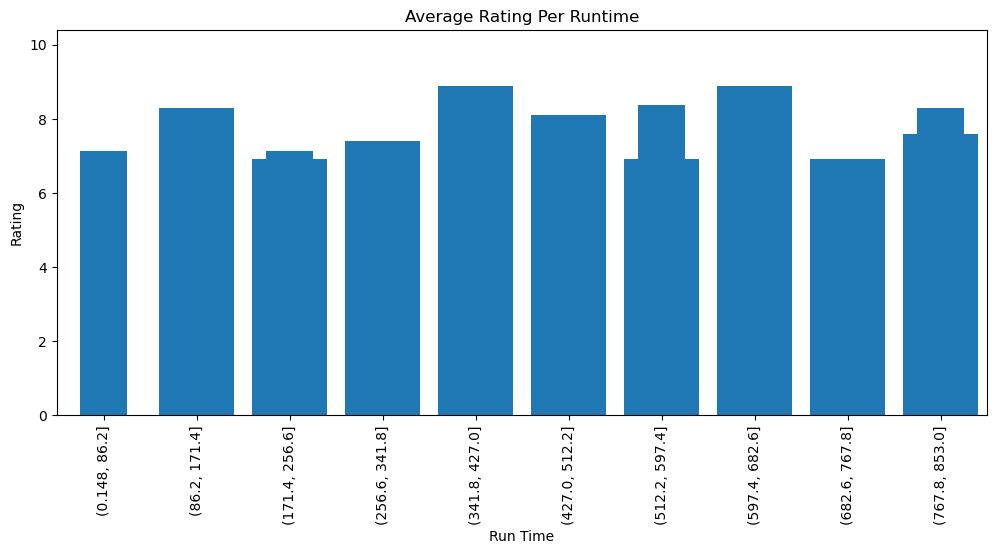

In [8]:
data['Runtime_bin'] = pd.cut(data['RunTime'],bins=10)
grouped = data.groupby('Runtime_bin')['RATING'].mean()
grouped.plot(kind='bar', figsize=(12, 5))
plt.bar(data['RunTime'],data['RATING'])
plt.xlabel('Run Time')
plt.ylabel('Rating')
plt.title('Average Rating Per Runtime')
plt.show()

**Grouping by Votes**

We divide the movies into 10 groups based on how many votes they received. Then we calculate and plot the average rating for each group. This helps us see if movies with more votes generally get better ratings.


C:\Users\Hassan\AppData\Local\Temp\ipykernel_7420\3961298857.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('vote_bins')['RATING'].mean()


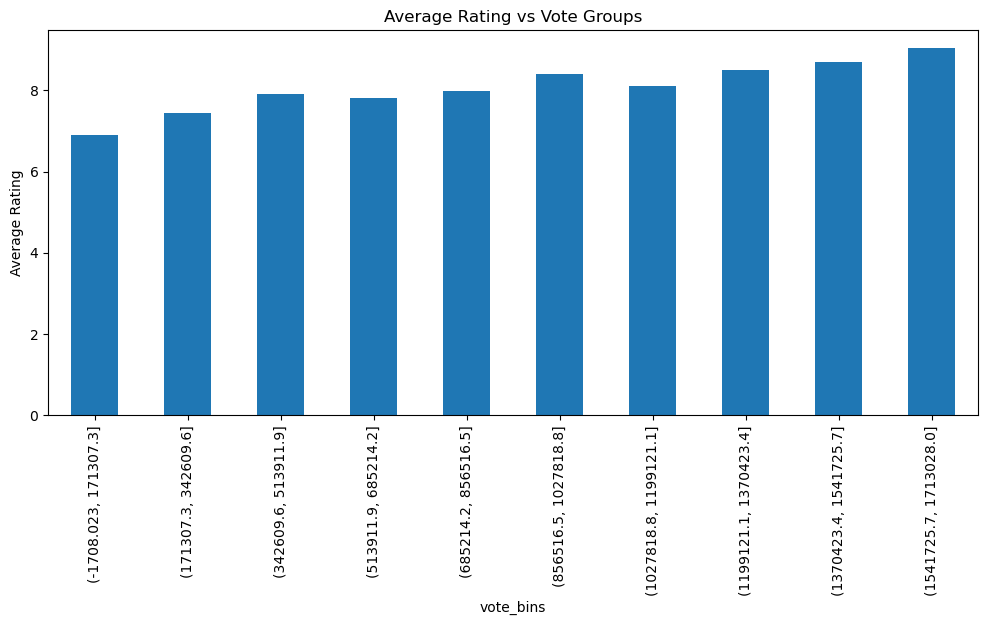

In [9]:
data['vote_bins'] = pd.cut(data['VOTES'], bins=10)
grouped = data.groupby('vote_bins')['RATING'].mean()
grouped.plot(kind='bar', figsize=(12, 5))
plt.ylabel('Average Rating')
plt.title('Average Rating vs Vote Groups')
plt.show()

In [10]:
top_movies = data.sort_values(by='RATING',ascending=False).head(10)
top_movies

,MOVIES,YEAR,RATING,VOTES,RunTime,Runtime_bin,vote_bins
7640,BoJack Horseman,2014.0,9.9,12369.0,26.0,"(0.148, 86.2]","(-1708.023, 171307.3]"
8510,Avatar: The Last Airbender,2005.0,9.9,8813.0,92.0,"(86.2, 171.4]","(-1708.023, 171307.3]"
8509,Avatar: The Last Airbender,2005.0,9.8,5283.0,92.0,"(86.2, 171.4]","(-1708.023, 171307.3]"
9892,Dexter,2006.0,9.8,11638.0,51.0,"(0.148, 86.2]","(-1708.023, 171307.3]"
8637,She-Ra and the Princesses of Power,2018.0,9.7,1434.0,24.0,"(0.148, 86.2]","(-1708.023, 171307.3]"
8541,The Midnight Gospel,2020.0,9.7,1731.0,36.0,"(0.148, 86.2]","(-1708.023, 171307.3]"
8767,Dark,2017.0,9.7,20230.0,73.0,"(0.148, 86.2]","(-1708.023, 171307.3]"
7159,Avatar: The Last Airbender,2005.0,9.7,2770.0,24.0,"(0.148, 86.2]","(-1708.023, 171307.3]"
8629,She-Ra and the Princesses of Power,2018.0,9.7,1262.0,24.0,"(0.148, 86.2]","(-1708.023, 171307.3]"
7641,BoJack Horseman,2014.0,9.6,4910.0,27.0,"(0.148, 86.2]","(-1708.023, 171307.3]"


**Top 10 Rated Movies**

We sort the data by rating (from highest to lowest) and then select the top 10 movies. This helps us identify the highest-rated movies in the dataset.


Text(0.5, 1.0, 'Movies Comparzion')

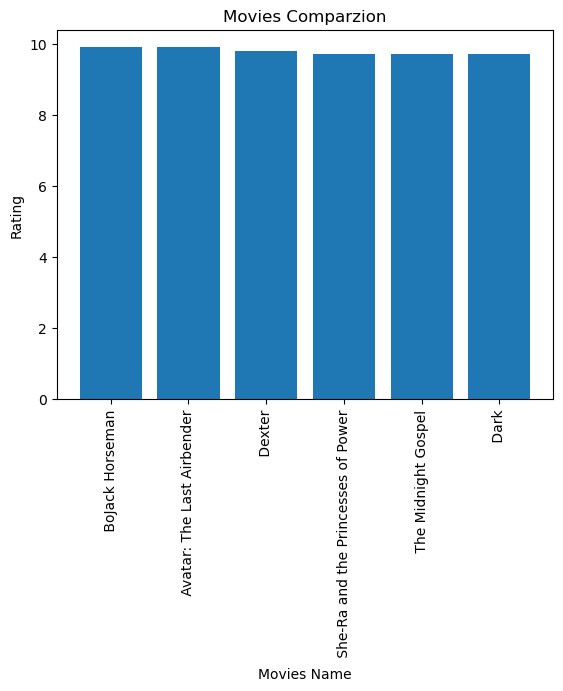

In [11]:
plt.bar( top_movies['MOVIES'], top_movies['RATING'] )
# plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.xlabel('Movies Name')
plt.ylabel('Rating')
plt.title('Movies Comparzion')

**Seaborn Chart: Votes vs Rating**

We use Seaborn (a prettier charting tool) to plot how the average rating varies based on different ranges of vote counts.


In [12]:
import seaborn as sns

d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


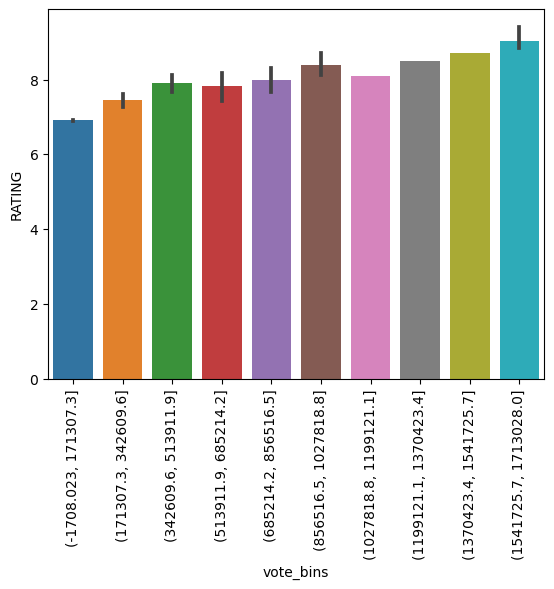

In [13]:
sns.barplot(data=data,x='vote_bins',y='RATING')
plt.xticks(rotation=90)
plt.show()

**Seaborn Chart: Runtime vs Rating**

Again using Seaborn, we compare average ratings across different movie runtimes to better understand the trend.


d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


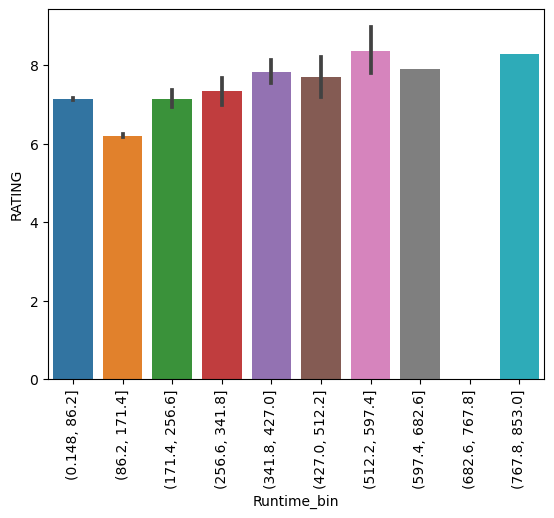

In [14]:
sns.barplot(data=data,x='Runtime_bin',y='RATING')
plt.xticks(rotation=90)
plt.show()

**Side-by-Side Comparison**

We create two side-by-side charts:
- One showing how ratings vary by votes.
- One showing how ratings vary by runtime.

This makes it easy to compare both trends together in one view.


d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


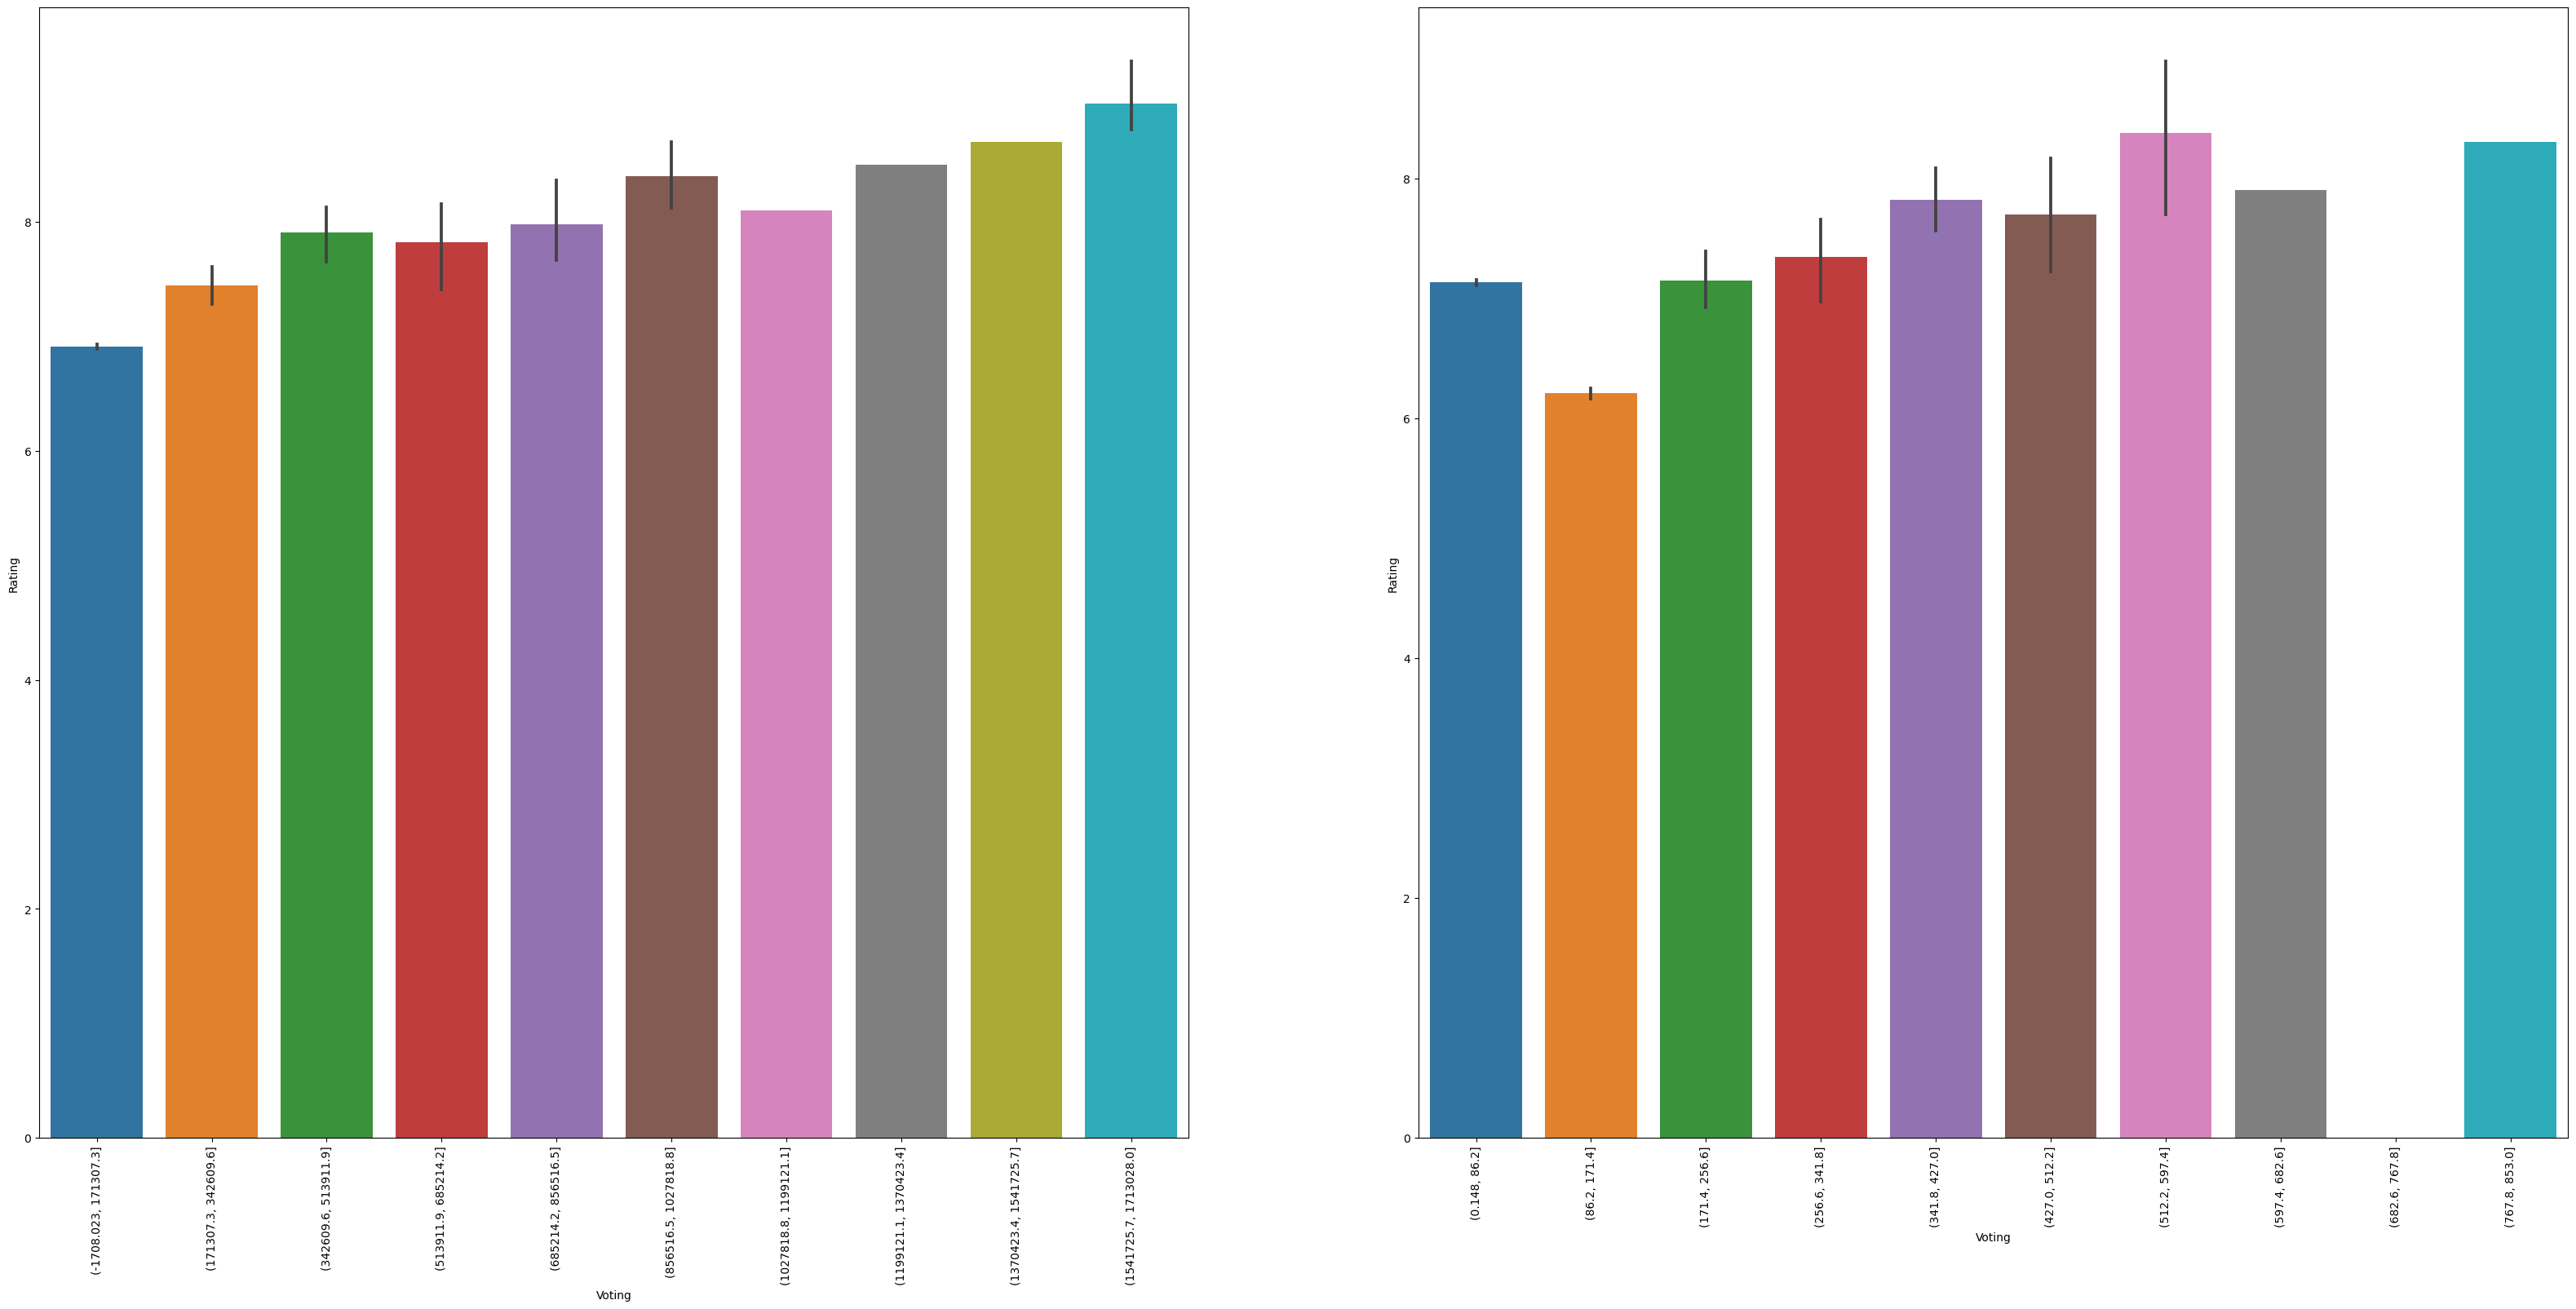

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(40,18))

ax1 = sns.barplot(data=data, x='vote_bins',y='RATING', ax= ax[0])
ax1.tick_params(axis='x', rotation=90) 
ax1.set_xlabel('Voting')
ax1.set_ylabel('Rating')
ax1.set_label('Comparzion between Movies Voting and rating')


ax2 = sns.barplot(data=data,x='Runtime_bin',y='RATING',ax= ax[1])
ax2.tick_params(axis='x', rotation=90) 
ax2.set_xlabel('Voting')
ax2.set_ylabel('Rating')
ax2.set_label('Comparzion between Movies Runtime and rating')

**PlotNine Visualization**

Here we use `plotnine` (another charting tool) to draw a stylish bar chart showing the relationship between votes and ratings. Same idea as before, just a different design.


In [19]:
from plotnine import *

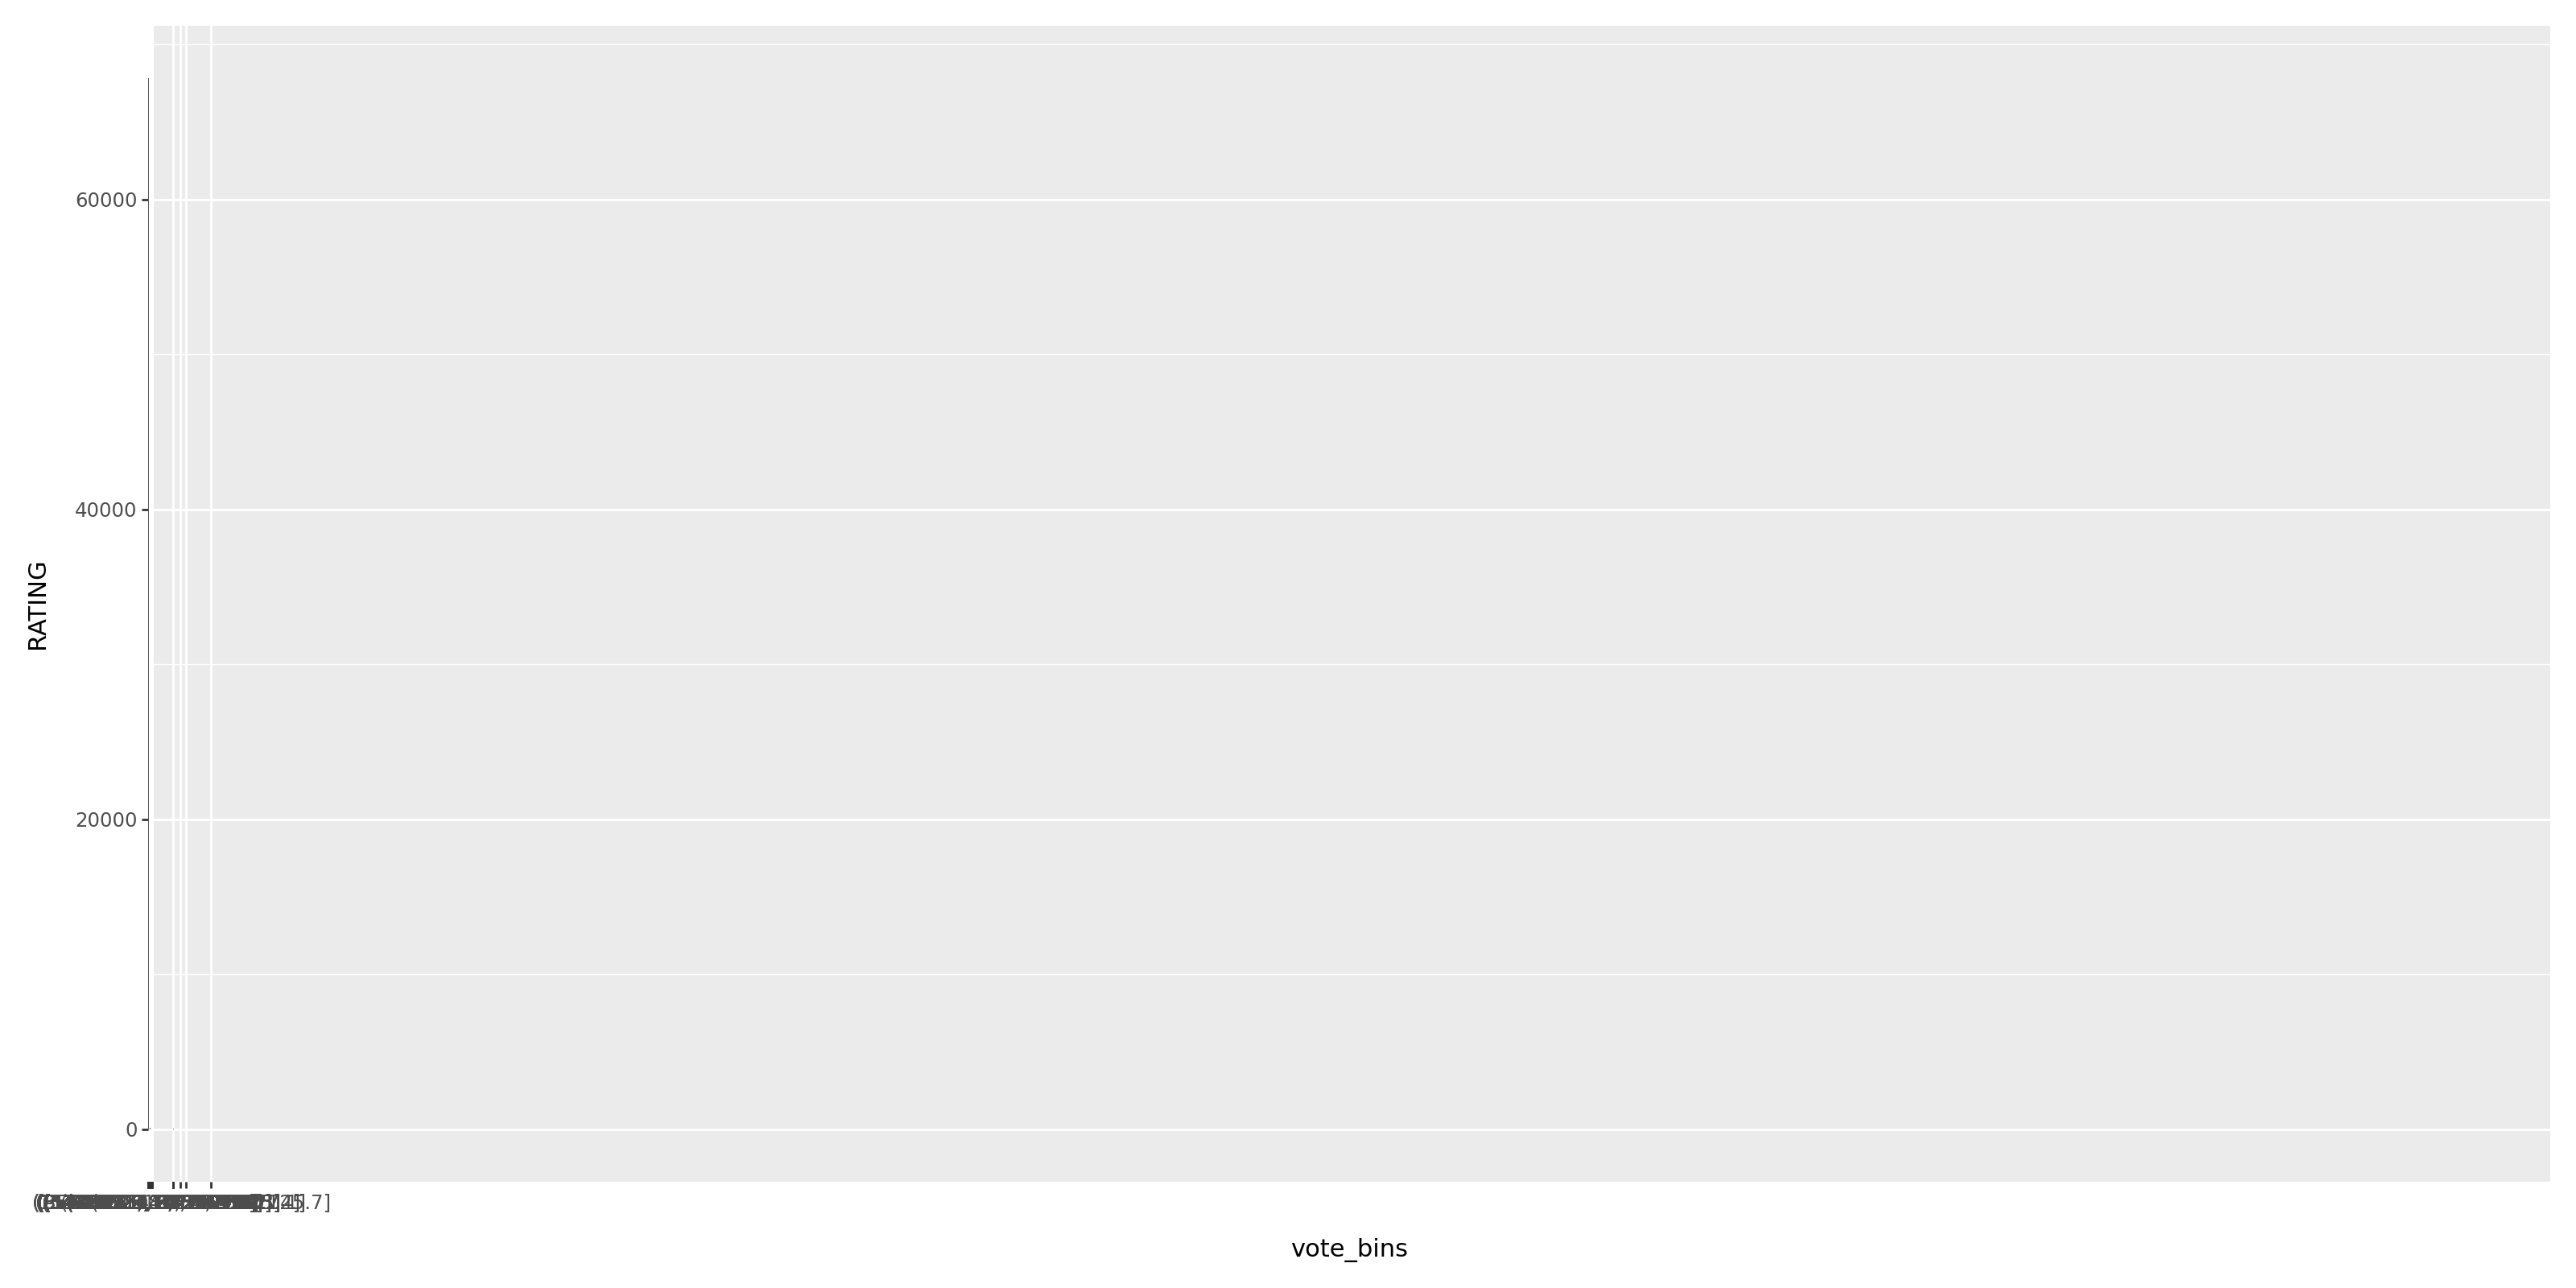

In [25]:
ggplot(data,aes(x='vote_bins',y = 'RATING')) + geom_bar(stat = 'identity') \
      + scale_x_discrete(limits=data['vote_bins'].tolist()) + theme(figure_size=(16, 8))

**Setting up Bokeh**

Bokeh is a tool for making interactive charts. We set it up here so we can create charts that users can zoom in on or hover over to explore.


In [27]:
from bokeh.plotting import figure, show
import bokeh.plotting as bk_plot
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

**Preparing Data for Bokeh**

We take the first 20 movies and remove any duplicates. Duplicate names can cause issues in interactive charts.


In [45]:
fig = figure(x_range=top_movies["MOVIES"], height = 500, width = 500)
fig.vbar(x = top_movies["MOVIES"], top = top_movies['RATING'], width = 0.9)
fig.xaxis.major_label_orientation = 'vertical'
show(fig)